In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Charger le dataset
data = pd.read_csv("dataset_final.csv")
data


,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Day_Between_Scheduling_and_Appointment,No-show,Quartier_hopital,Specialite,Type_etablissement,Distance_km,Type_de_soins,Date_prise_rdv,Date_rdv,Deja_soigne,Nom_patient,Age.1,Statut_social,Handicap,SMS_recu,Conditions_meteo,Numero_telephone,Email,Heure_rdv,Sexe,Nombre_consultations_12mois,Duree_attente_minutes,Note_hopital,Tarification_moyenne
0,0,1,0,0,0,0,0,No,Pigalle,Pédiatrie,Conventionné,45.9,Vaccination,2024-11-01,2025-05-30,1,Mathilde-Christelle Ramos,7,Indépendant,0,0,1,+33 (0)2 83 95 50 05,tverdier@laposte.net,05:01,Homme,12,94,2.0,112.40
1,0,0,0,0,0,0,0,No,Bastille,Gynécologie,Non conventionné,11.0,Urgence,2024-06-23,2025-05-30,1,Denis Gilbert,85,Étudiant,0,1,0,04 84 41 21 76,laurenceroche@noos.fr,18:10,Homme,10,14,2.1,31.95
2,0,0,0,0,0,0,0,No,Saint-Germain,Dermatologie,Conventionné,5.0,Suivi,2024-10-15,2025-05-30,1,Martin du Carre,5,Étudiant,1,0,1,0249672140,zrousseau@free.fr,22:14,Femme,18,148,4.4,83.63
3,0,0,0,0,0,0,0,No,Belleville,Cardiologie,Conventionné,41.5,Vaccination,2024-11-13,2025-05-30,1,Rémy Pons-Marchal,54,Retraité,0,1,1,+33 (0)2 37 32 24 32,kchretien@free.fr,04:28,Homme,8,51,2.4,146.65
4,0,1,1,0,0,0,0,No,Belleville,Dermatologie,Non conventionné,5.1,Urgence,2024-07-01,2025-05-30,0,Gabriel Dos Santos,2,Indépendant,0,1,1,+33 (0)3 64 50 16 91,lucdias@yahoo.fr,23:41,Femme,19,78,3.7,134.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,1,35,No,Montparnasse,Pédiatrie,Non conventionné,3.3,Bilan,2024-08-09,2025-05-30,1,Élise-Jeanne Brunet,15,Indépendant,1,0,1,+33 (0)5 93 09 12 53,fmartins@voila.fr,18:20,Homme,3,109,4.7,96.86
110523,0,0,0,0,0,1,35,No,Bastille,Pédiatrie,Conventionné,27.5,Urgence,2024-06-13,2025-05-30,1,Gilbert Bouvier,45,Sans emploi,0,0,0,+33 (0)2 44 13 11 39,michellegallet@mathieu.com,09:21,Femme,9,138,2.4,106.17
110524,0,0,0,0,0,1,41,No,Belleville,Cardiologie,Conventionné,30.5,Bilan,2024-06-23,2025-05-30,1,Benjamin Duval,89,Sans emploi,1,1,0,+33 (0)4 46 76 50 53,whubert@club-internet.fr,02:25,Femme,2,170,2.5,145.62
110525,0,0,0,0,0,1,41,No,La Défense,Pédiatrie,Non conventionné,29.6,Suivi,2024-10-20,2025-05-30,1,Noël-Alphonse Seguin,18,Salarié,1,1,0,+33 (0)6 27 39 31 79,renauddiane@chartier.net,02:44,Femme,9,42,4.2,126.57


In [ ]:
#data = data.drop(["PatientId", "AppointmentID"], axis=1)
#data

In [ ]:
# Remplacer les NaN par la valeur la plus fréquente dans chaque colonne
#for column in data.columns:
#    if data[column].isna().sum() > 0:  # Si la colonne contient des NaN
#        most_frequent_value = data[column].mode()[0]  # Valeur la plus fréquente
#        data[column] = data[column].fillna(most_frequent_value)  # Remplacer les NaN par la valeur la plus fréquente

# Afficher le DataFrame après modification
#print(data)


In [ ]:
print(data.isna().sum())  # Affiche le nombre de NaN par colonne

Scholarship                               0
Hipertension                              0
Diabetes                                  0
Alcoholism                                0
Handcap                                   0
SMS_received                              0
Day_Between_Scheduling_and_Appointment    0
No-show                                   0
Quartier_hopital                          0
Specialite                                0
Type_etablissement                        0
Distance_km                               0
Type_de_soins                             0
Date_prise_rdv                            0
Date_rdv                                  0
Deja_soigne                               0
Nom_patient                               0
Age.1                                     0
Statut_social                             0
Handicap                                  0
SMS_recu                                  0
Conditions_meteo                          0
Numero_telephone                

In [ ]:
from pycaret.classification import*


In [ ]:
s = setup(data,target="No-show")

In [ ]:
# pour normaliser
from pycaret.classification import*
s = setup(data,target="No-show",normalize = True,normalize_method ="minmax")

In [ ]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6240,0.5867,0.1323,0.5366,0.2123,0.0716,0.1021,7.5260
nb,Naive Bayes,0.6171,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7610
dt,Decision Tree Classifier,0.6171,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.9870
ridge,Ridge Classifier,0.6171,0.6167,0.0000,0.0000,0.0000,0.0000,0.0000,1.8520
rf,Random Forest Classifier,0.6171,0.6361,0.0000,0.1000,0.0001,-0.0000,-0.0003,4.5900
ada,Ada Boost Classifier,0.6171,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7720
gbc,Gradient Boosting Classifier,0.6171,0.5035,0.0000,0.0000,0.0000,0.0000,0.0000,7.5780
xgboost,Extreme Gradient Boosting,0.6171,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,2.5670
dummy,Dummy Classifier,0.6171,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.8510
lda,Linear Discriminant Analysis,0.6168,0.5423,0.0008,0.0681,0.0015,-0.0002,-0.0012,2.1430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# matrice de confusion
model = compare_models(sort = "F1",n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6240,0.5867,0.1323,0.5366,0.2123,0.0716,0.1021,7.2100
svm,SVM - Linear Kernel,0.6076,0.5438,0.1076,0.4490,0.1718,0.0297,0.0427,1.8960
lightgbm,Light Gradient Boosting Machine,0.5703,0.5068,0.2000,0.0766,0.1108,0.0000,0.0018,3.4770
lr,Logistic Regression,0.6130,0.5661,0.0390,0.4396,0.0713,0.0099,0.0219,1.8010
qda,Quadratic Discriminant Analysis,0.5937,0.4939,0.1000,0.0383,0.0554,0.0000,0.0009,2.0050
et,Extra Trees Classifier,0.6155,0.5728,0.0203,0.4566,0.0385,0.0062,0.0192,4.2050
lda,Linear Discriminant Analysis,0.6168,0.5423,0.0008,0.0681,0.0015,-0.0002,-0.0012,2.1150
rf,Random Forest Classifier,0.6171,0.6361,0.0000,0.1000,0.0001,-0.0000,-0.0003,4.7640
dt,Decision Tree Classifier,0.6171,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.8410
nb,Naive Bayes,0.6171,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7500


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
# creation du meilleure model
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6170,0.6215,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6169,0.6180,0.0000,0.0000,0.0000,-0.0003,-0.0090
2,0.6170,0.6628,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6170,0.6385,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6170,0.6304,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6170,0.6223,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6172,0.6394,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6173,0.6361,0.0003,1.0000,0.0007,0.0004,0.0144
8,0.6170,0.6617,0.0000,0.0000,0.0000,-0.0003,-0.0090


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

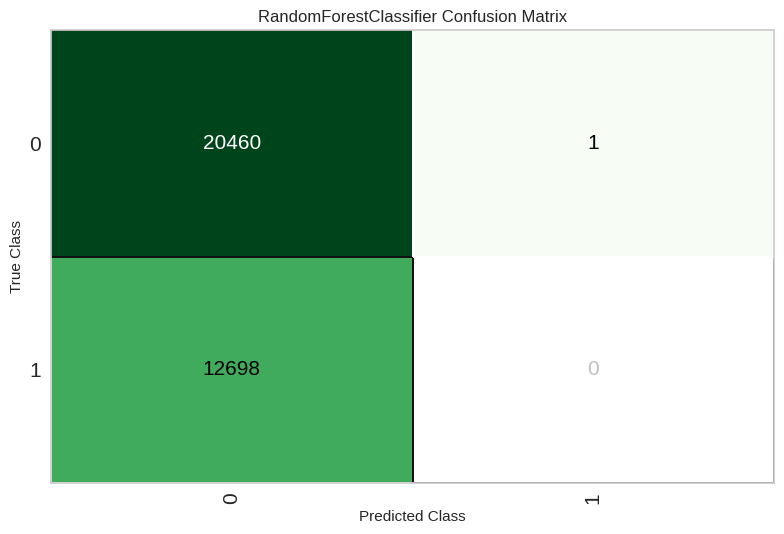

In [ ]:
# evaluation du model
plot_model(rf,plot="confusion_matrix")

In [ ]:
data

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Day_Between_Scheduling_and_Appointment,Quartier_hopital,Specialite,Type_etablissement,...,Conditions_meteo,Numero_telephone,Email,Heure_rdv,Sexe,Nombre_consultations_12mois,Duree_attente_minutes,Note_hopital,Tarification_moyenne,Statut_rdv
0,0,1,0,0,0,0,0,Pigalle,Pédiatrie,Conventionné,...,1,+33 (0)2 83 95 50 05,tverdier@laposte.net,05:01,Homme,12,94,2.0,112.40,0
1,0,0,0,0,0,0,0,Bastille,Gynécologie,Non conventionné,...,0,04 84 41 21 76,laurenceroche@noos.fr,18:10,Homme,10,14,2.1,31.95,0
2,0,0,0,0,0,0,0,Saint-Germain,Dermatologie,Conventionné,...,1,0249672140,zrousseau@free.fr,22:14,Femme,18,148,4.4,83.63,0
3,0,0,0,0,0,0,0,Belleville,Cardiologie,Conventionné,...,1,+33 (0)2 37 32 24 32,kchretien@free.fr,04:28,Homme,8,51,2.4,146.65,1
4,0,1,1,0,0,0,0,Belleville,Dermatologie,Non conventionné,...,1,+33 (0)3 64 50 16 91,lucdias@yahoo.fr,23:41,Femme,19,78,3.7,134.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,1,35,Montparnasse,Pédiatrie,Non conventionné,...,1,+33 (0)5 93 09 12 53,fmartins@voila.fr,18:20,Homme,3,109,4.7,96.86,1
110523,0,0,0,0,0,1,35,Bastille,Pédiatrie,Conventionné,...,0,+33 (0)2 44 13 11 39,michellegallet@mathieu.com,09:21,Femme,9,138,2.4,106.17,0
110524,0,0,0,0,0,1,41,Belleville,Cardiologie,Conventionné,...,0,+33 (0)4 46 76 50 53,whubert@club-internet.fr,02:25,Femme,2,170,2.5,145.62,0
110525,0,0,0,0,0,1,41,La Défense,Pédiatrie,Non conventionné,...,0,+33 (0)6 27 39 31 79,renauddiane@chartier.net,02:44,Femme,9,42,4.2,126.57,1


In [ ]:
#sns.histplot(x='person_age',data = data, hue ="person_income")

In [ ]:
#visualisation
sns.scatterplot(x='Age_1', y='Distance_km', data=data, hue='No-show')

ValueError: Could not interpret value `Age_1` for `x`. An entry with this name does not appear in `data`.

In [ ]:
# le roc
plot_model(rf,plot = "auc")

In [ ]:
# quel colone a un poids sur ma prediction
plot_model(rf,plot="feature")

In [ ]:
# pour optimize utiliser pour les hyper paramettre
!pip install optuna

In [ ]:
!pip install pycaret[tuners]

In [ ]:
tuned_rf = tune_model(rf,optimize ="F1")

In [ ]:
3 #sauvegarder le model
save_model(tuned_rf,"doctolib_PR")